In [42]:
#Please note the following analysis is only for learning purposes.
#the dataset of the analysis can be found in the following link https://open.canada.ca/data/en/dataset/d00dd235-d194-4932-9ec0-45011d2bd347
#this analysis is about the black carbon emission in Canada, specifically the amount of the particulate matter (PM2.5) emissions from combustion-related sources  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

pd.options.display.max_rows =40
data = pd.read_csv(r"...filepath\EN_BC_CanProvTerr.csv", sep=';')

In [43]:
data.head(2)

,Index,Source,Sector,Subsector,Region,2013 PM25 (tonnes),2014 PM25 (tonnes),2015 PM25 (tonnes),2016 PM25 (tonnes),2017 PM25 (tonnes),2018 PM25 (tonnes),2019 PM25 (tonnes),2013 BC (tonnes),2014 BC (tonnes),2015 BC (tonnes),2016 BC (tonnes),2017 BC (tonnes),2018 BC (tonnes),2019 BC (tonnes)
0,1,Ore and Mineral Industries,NaN,NaN,AB,236.9665,219.5573,160.3125,201.1650,214.4323,212.6911,256.318964,4.303720,4.159094,3.572919,5.018986,3.067963,3.005692,3.424503
1,1,Ore and Mineral Industries,NaN,NaN,NB,56.7428,87.0813,10.8401,1.0808,1.8107,1.5820,1.820000,1.577764,2.271267,0.276327,0.003565,0.006853,0.005945,0.006790


In [44]:
data.shape

(438, 19)

In [45]:
#find unique values
data['Region'].unique() 

array(['AB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'QC', 'SK', 'YT', 'BC',
       'MB', 'PE'], dtype=object)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               438 non-null    int64  
 1   Source              438 non-null    object 
 2   Sector              358 non-null    object 
 3   Subsector           309 non-null    object 
 4   Region              438 non-null    object 
 5   2013 PM25 (tonnes)  425 non-null    float64
 6   2014 PM25 (tonnes)  423 non-null    float64
 7   2015 PM25 (tonnes)  429 non-null    float64
 8   2016 PM25 (tonnes)  432 non-null    float64
 9   2017 PM25 (tonnes)  433 non-null    float64
 10  2018 PM25 (tonnes)  436 non-null    float64
 11  2019 PM25 (tonnes)  434 non-null    float64
 12  2013 BC (tonnes)    425 non-null    float64
 13  2014 BC (tonnes)    423 non-null    float64
 14  2015 BC (tonnes)    429 non-null    float64
 15  2016 BC (tonnes)    432 non-null    float64
 16  2017 BC 

In [47]:
# matrix shows MAR
#the following matrix shows, the "Sector" field is MAR, and this could be a systematic relationship between missingness and other obserbed data but not the missing data

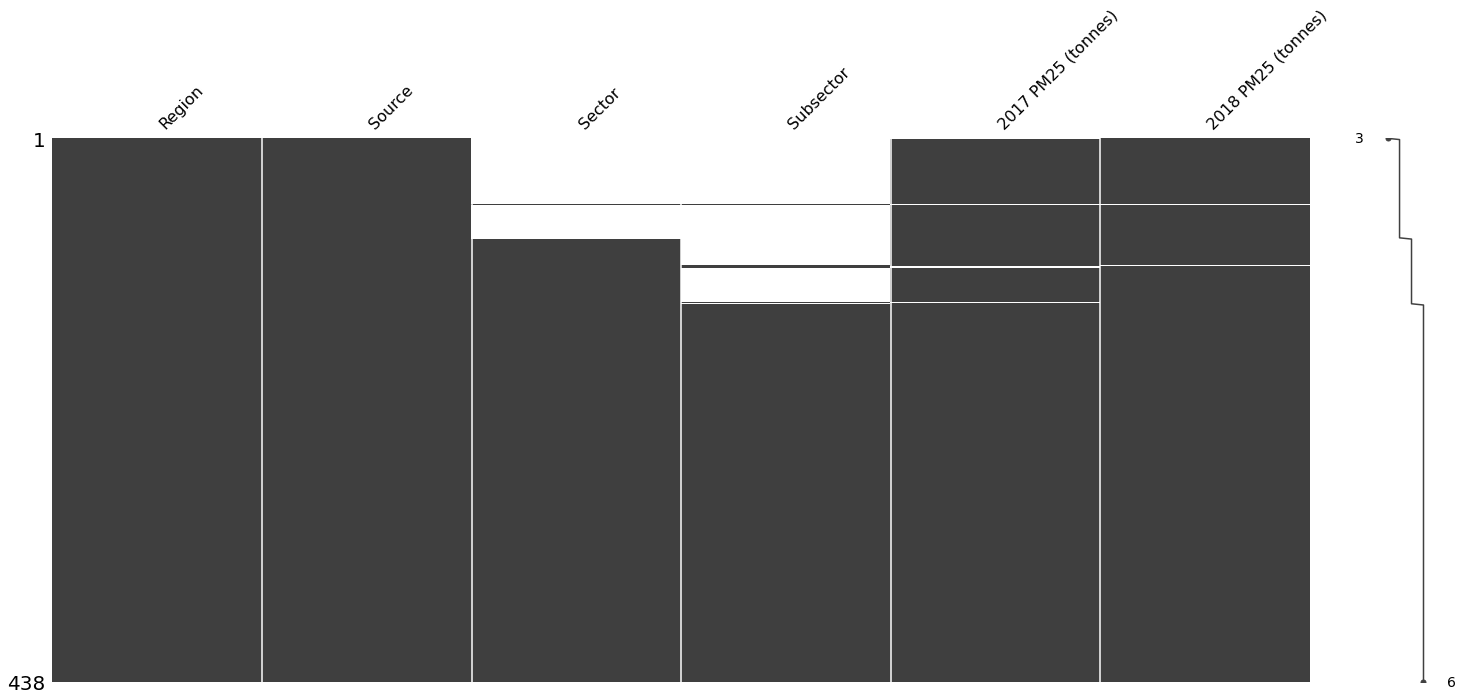

In [48]:
#visualize missing values in the dataset
msdf = data[["Region", "Source","Sector", "Subsector", "2017 PM25 (tonnes)", "2018 PM25 (tonnes)"]]
msno.matrix(msdf, sort='ascending')
plt.show()

In [49]:
# eventhough the sector field seems to be MAR, but below shows no correlation at all; this could be a systematic relationship between missingness and other obserbed data but not the missing data

<AxesSubplot:>

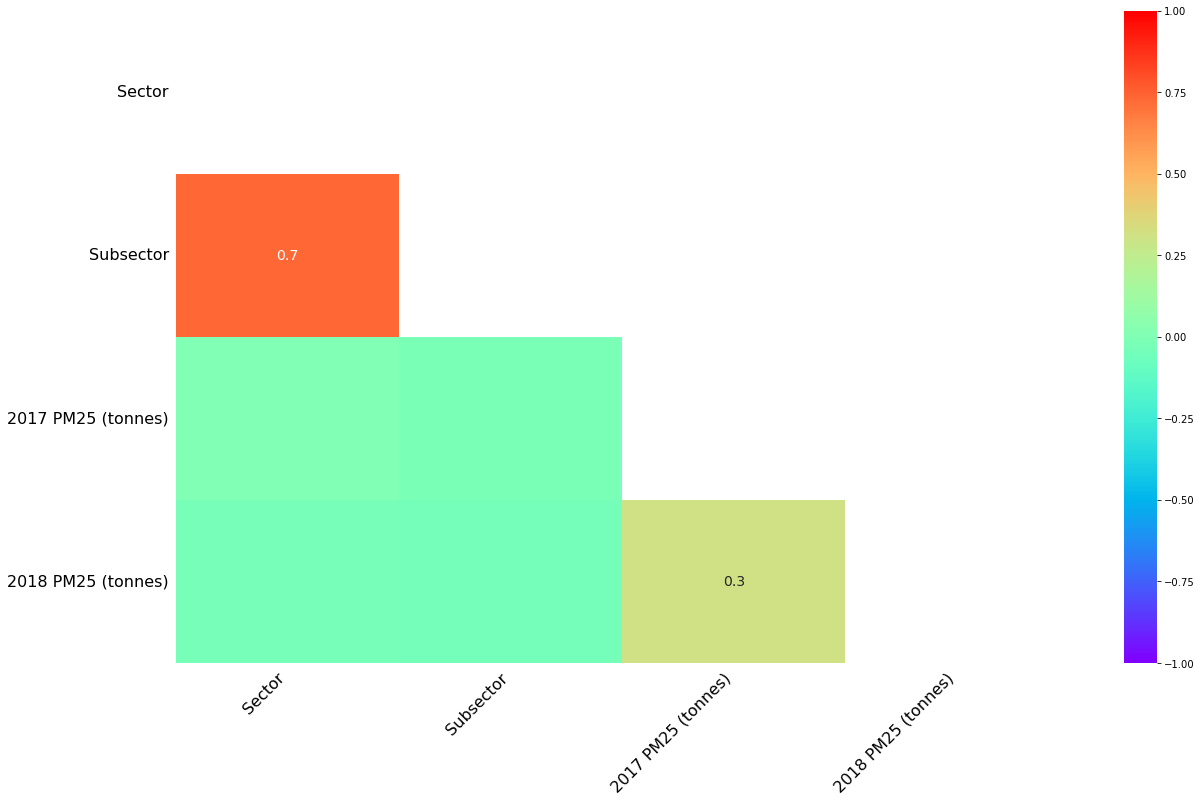

In [50]:
msno.heatmap(msdf.sort_values("Source"), cmap="rainbow")

In [53]:
# further analysis - if we look at the 2017PM2.5(tonnes) & 2018PM2.5(tonnes) fields respectively all the missing values seem to be obove 1792 PM2.5 and 1814 PM2.5

In [54]:
missing_df =msdf[msdf['Sector'].isna()]
complete_df = msdf[~msdf['Sector'].isna()]

missing_df.describe(), complete_df.describe()

(       2017 PM25 (tonnes)  2018 PM25 (tonnes)
 count           79.000000           80.000000
 mean          1792.266337         1814.234085
 std           4671.526527         4829.118418
 min              0.138458            0.030000
 25%             36.865000           37.248057
 50%            214.432300          206.278797
 75%           1725.440295         1415.386575
 max          34964.267420        36381.135680,
        2017 PM25 (tonnes)  2018 PM25 (tonnes)
 count          354.000000          356.000000
 mean           695.101605          712.529416
 std           2477.737775         2568.411826
 min              0.000000            0.000000
 25%              3.499067            4.443048
 50%             50.572271           51.698849
 75%            446.305446          427.620575
 max          34431.120390        35869.436520)

In [56]:
#The field 'subsector' is a subcategory of the field 'Source' with 35 rows of null values 
count_subsectorna = data[(data['Source'] == 'Commercial / Residential / Institutional') & (data['Subsector'].isna())]
count_subsectorna.describe()

,Index,2013 PM25 (tonnes),2014 PM25 (tonnes),2015 PM25 (tonnes),2016 PM25 (tonnes),2017 PM25 (tonnes),2018 PM25 (tonnes),2019 PM25 (tonnes),2013 BC (tonnes),2014 BC (tonnes),2015 BC (tonnes),2016 BC (tonnes),2017 BC (tonnes),2018 BC (tonnes),2019 BC (tonnes)
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,46.342857,5308.472677,5284.201972,5046.494858,4680.642986,4618.812343,4776.377898,4745.988377,490.962605,491.530009,471.266487,444.472869,447.172229,465.785386,463.869291
std,2.950004,10484.164474,10641.905984,10289.221460,9264.225181,8691.399695,9043.031385,9054.076372,900.585993,920.629430,894.163476,811.389512,773.757836,809.659268,815.169027
min,43.000000,0.783000,0.211000,0.171000,0.150000,0.187500,0.205000,0.244500,0.025069,0.010285,0.009317,0.008338,0.010422,0.012023,0.015097
25%,43.000000,83.988767,84.801371,85.479468,119.559501,117.297138,123.505420,133.415840,8.173964,8.046368,7.267541,7.103491,6.929292,7.370927,8.077083
50%,46.000000,964.189467,940.874951,820.734357,942.643143,1163.345764,1234.632129,1220.523056,88.648099,85.194449,77.645897,84.128518,107.300209,121.091046,123.444545
75%,50.000000,5343.294713,4678.175521,3753.222182,4131.155302,4657.695825,4475.543703,4556.531806,519.111409,461.527835,376.894129,488.846779,479.536030,485.174617,491.099805
max,50.000000,42126.061550,42758.186930,41661.144800,37713.090400,34964.267420,36381.135680,36333.797460,3552.540412,3632.294563,3566.400240,3258.769540,3055.659027,3193.141607,3214.602660


In [11]:
#field 'sector' is a subcategory of the field source with 12 rows null values
count_sectorna = data[(data['Source'] == 'Commercial / Residential / Institutional') & (data['Sector'].isna())]
count_sectorna.describe()

,Index,2013 PM25 (tonnes),2014 PM25 (tonnes),2015 PM25 (tonnes),2016 PM25 (tonnes),2017 PM25 (tonnes),2018 PM25 (tonnes),2019 PM25 (tonnes),2013 BC (tonnes),2014 BC (tonnes),2015 BC (tonnes),2016 BC (tonnes),2017 BC (tonnes),2018 BC (tonnes),2019 BC (tonnes)
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,43.0,7840.220178,7810.810597,7459.319170,6926.032396,6844.607252,7077.490744,7036.572439,752.271087,755.266276,724.052734,685.497485,692.872887,721.362117,719.753827
std,0.0,12406.934155,12627.418817,12222.274560,10988.603426,10278.855259,10700.293276,10730.415328,1073.948081,1102.978605,1071.858674,972.548729,928.086387,970.207773,979.552403
min,43.0,2.975000,1.173500,1.142000,0.988000,0.837500,1.095000,1.000500,0.341681,0.187901,0.186221,0.163706,0.164599,0.210931,0.230710
25%,43.0,923.680096,857.901626,726.302584,872.987386,1097.932231,1218.658348,1240.465285,124.385253,116.740193,100.759641,120.826074,149.088893,164.398998,166.854461
50%,43.0,2180.909978,2105.259428,1785.346982,2695.125829,3417.280426,3500.168158,3426.121563,327.098775,322.407939,278.219740,357.076296,361.374053,379.608530,378.186709
75%,43.0,7695.106156,7515.227385,8058.527600,6482.563906,5533.434708,5832.388863,5726.840282,747.931183,734.868431,794.270506,646.127221,637.158011,663.848944,643.708951
max,43.0,42126.061550,42758.186930,41661.144800,37713.090400,34964.267420,36381.135680,36333.797460,3552.540412,3632.294563,3566.400240,3258.769540,3055.659027,3193.141607,3214.602660


In [55]:
# based on the obove analysis morethan 50% of the missing values are in the 'Commercial / Residential / Institutional'  category

In [60]:
#replacing null values with a default value: 'not identified'
data['_Sector'] = data['Sector'].fillna('not identified')

In [61]:
#repeated the above task for the subsector field 
data['_Subsector'] = data['Subsector'].fillna('not identified')

In [62]:
data['_Subsector'].isna().sum()

0

In [63]:
#column selection
df = data[['Region','Source','_Sector','_Subsector','2017 PM25 (tonnes)','2018 PM25 (tonnes)','2019 PM25 (tonnes)']]
df_BC = data[['Region','Source','_Sector','_Subsector','2017 BC (tonnes)','2018 BC (tonnes)', '2019 BC (tonnes)']]

In [64]:
#rename some of the fields of the dataset
df = df.rename(columns={'Source':'Source','_Sector':'Sector', '_Subsector':'Subsector','Region':'Region', '2017 PM25 (tonnes)':'2017PM25_tonnes','2018 PM25 (tonnes)':'2018PM25_tonnes', '2019 PM25 (tonnes)':'2019PM25_tonnes'})
df_BC = df_BC.rename(columns={'Source':'Source','_Sector':'Sector','_Subsector':'Subsector','Region':'Region','2018 BC (tonnes)':'2018BC_PM25_tonnes', '2019 BC (tonnes)':'2019BC_PM25_tonnes'})
df.describe()


,2017PM25_tonnes,2018PM25_tonnes,2019PM25_tonnes
count,433.000000,436.000000,434.000000
mean,895.277156,914.677062,914.506838
std,3022.709592,3130.655449,3136.747974
min,0.000000,0.000000,0.000000
25%,5.626168,5.643054,5.708278
50%,74.517039,74.800043,72.920677
75%,566.070971,587.591863,549.107048
max,34964.267420,36381.135680,36333.797460


In [66]:
#find null values for both dataframes: 
df.isna().sum(), df_BC.isna().sum()

(Region             0
 Source             0
 Sector             0
 Subsector          0
 2017PM25_tonnes    5
 2018PM25_tonnes    2
 2019PM25_tonnes    4
 dtype: int64,
 Region                0
 Source                0
 Sector                0
 Subsector             0
 2017 BC (tonnes)      5
 2018BC_PM25_tonnes    2
 2019BC_PM25_tonnes    4
 dtype: int64)

In [67]:
#filling null values with 0
df = df.fillna(0)
df.isna().sum()

Region             0
Source             0
Sector             0
Subsector          0
2017PM25_tonnes    0
2018PM25_tonnes    0
2019PM25_tonnes    0
dtype: int64

In [68]:
# since the dataset has extreme values I opts not to use mean to fillna
df_BC = df_BC.fillna(0)
df_BC.isna().sum()

Region                0
Source                0
Sector                0
Subsector             0
2017 BC (tonnes)      0
2018BC_PM25_tonnes    0
2019BC_PM25_tonnes    0
dtype: int64

<AxesSubplot:xlabel='2019PM25_tonnes'>

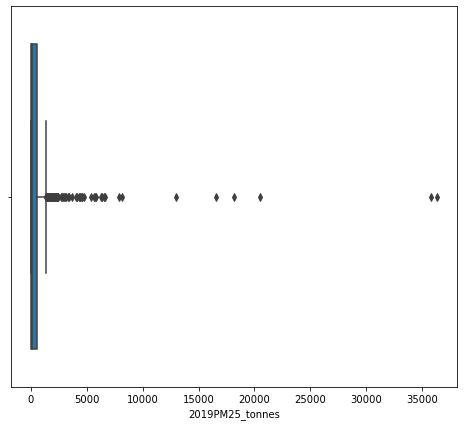

In [70]:
#the box plot is showing the 2019PM25_tonnes is heavy right skewed with extreme values
size =(8, 7)
fig, ax = plt.subplots(figsize=size)
sns.boxplot(ax=ax, x=df['2019PM25_tonnes'])

<AxesSubplot:xlabel='2019BC_PM25_tonnes'>

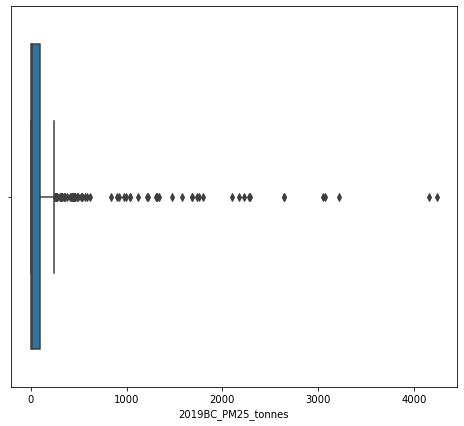

In [71]:
#BC dataset is also right skewed
size =(8,7)
fig, ax = plt.subplots(figsize=size)
sns.boxplot(ax=ax, x=df_BC['2019BC_PM25_tonnes'])


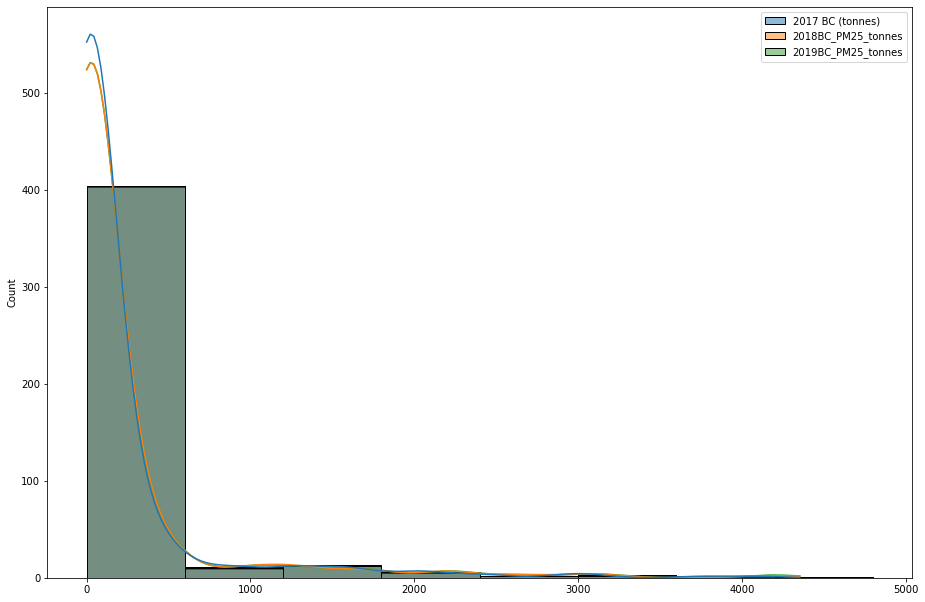

In [72]:
#another way visualize the skewness of the dataset
_dfBC = df_BC.copy(deep=True)
plt.figure(figsize=(15.5,10.5))
sns.histplot(_dfBC, binwidth=600, kde=True)
plt.show()

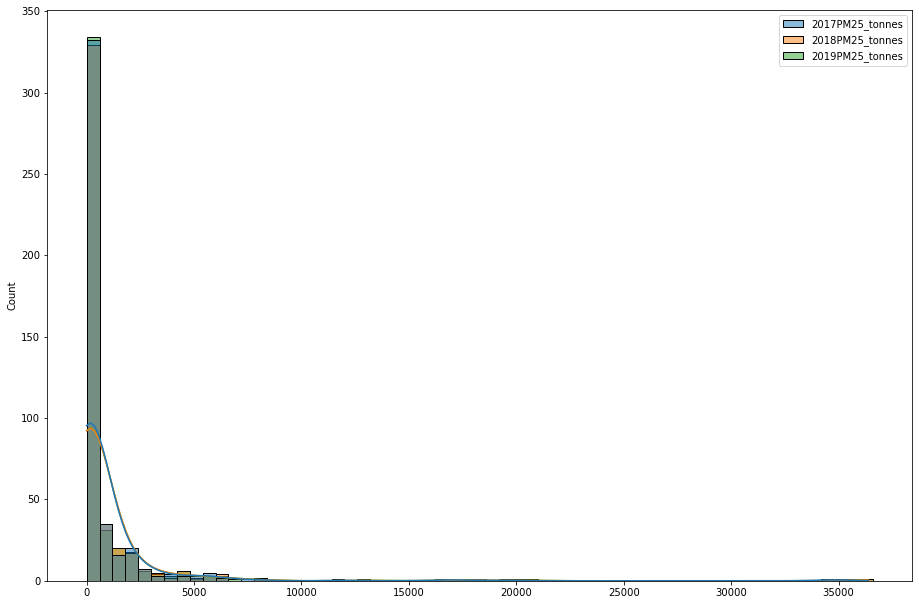

In [73]:
_df = df.copy(deep=True)
plt.figure(figsize=(15.5,10.5))
sns.histplot(_df, binwidth=600, kde=True)
plt.show()

In [75]:
# Relative frequency proportion

In [78]:
df_copy = df.copy(deep=True)
_df_pivot = df_copy[['Sector', '2017PM25_tonnes']]


In [79]:
_df_pivot = pd.pivot_table(_df_pivot, index=['Sector'], aggfunc = np.sum)
_df_pivot = _df_pivot.sort_values(by='2017PM25_tonnes', ascending=False)

In [80]:
_df_pivot.head()

,2017PM25_tonnes
Sector,
Home Firewood Burning,154325.240786
not identified,141589.040651
Off-Road Transport,29950.215828
On-Road Transport,24678.398243
Pulp and Paper Industry,5853.507800


In [81]:
_df_pivot['%2017PM25_tonnes '] = (_df_pivot['2017PM25_tonnes']/_df_pivot['2017PM25_tonnes'].sum())*100
tdf_ = _df_pivot['%2017PM25_tonnes ']
tdf_.head()

Sector
Home Firewood Burning      39.809944
not identified             36.524497
Off-Road Transport          7.725997
On-Road Transport           6.366072
Pulp and Paper Industry     1.509979
Name: %2017PM25_tonnes , dtype: float64

In [ ]:
# Based on the given dataset roughly 60% of the black carbon emissions come from the "Home Firewood Burning"(40%) 

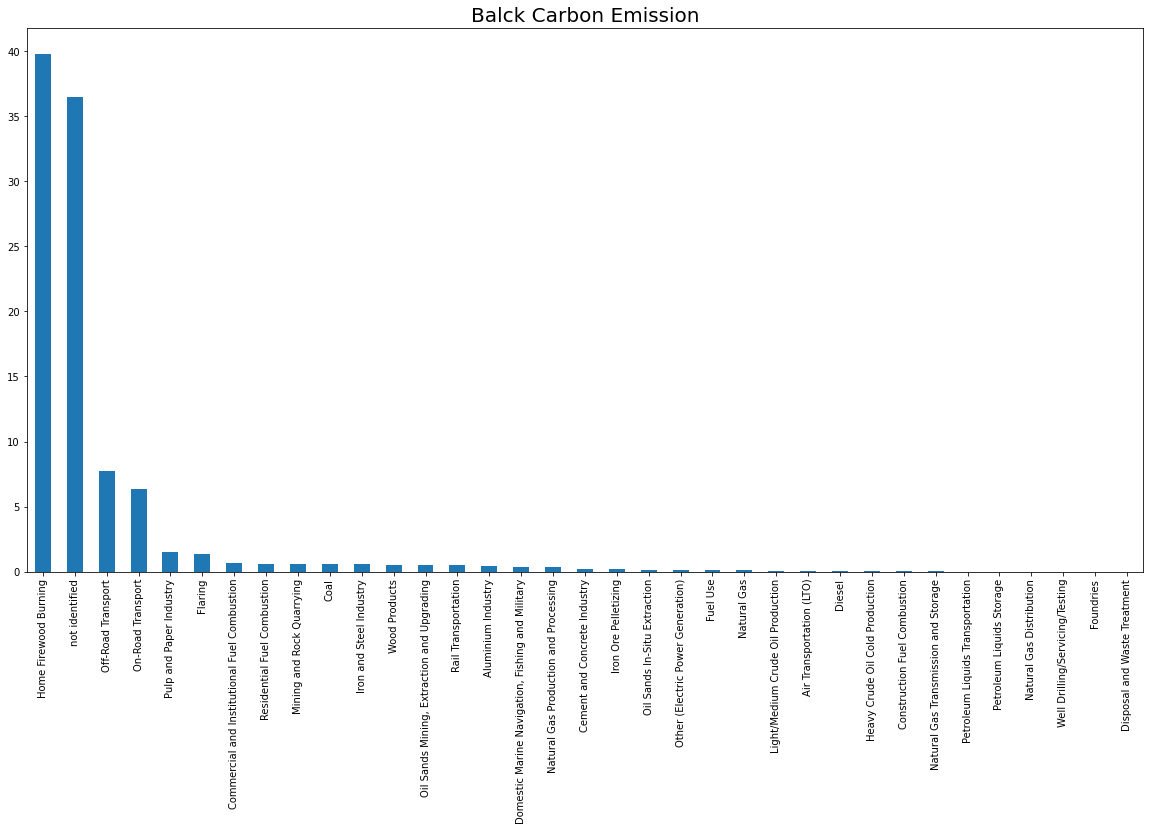

In [82]:
size = (20,10)
fig, ax = plt.subplots(figsize=size) 

tdf_.plot(ax=ax, kind='bar', sort_columns =True)
plt.title('Balck Carbon Emission', fontsize=20)
plt.xlabel('')
plt.show()

In [83]:
_df = df[df['2018PM25_tonnes'] != 0]
_df = _df.sort_values(by='2018PM25_tonnes')
_df = _df[['2018PM25_tonnes']]
_df.shape

(432, 1)

In [84]:
copy_df = _df.copy(deep=True)

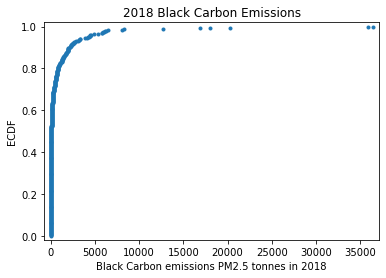

In [85]:
#90% of the black carbon emissions had 5000pm2.5 tonnes or less

x=np.sort(copy_df['2018PM25_tonnes'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y, marker='.', linestyle='none')
plt.title('2018 Black Carbon Emissions')
plt.ylabel('ECDF')
plt.xlabel('Black Carbon emissions PM2.5 tonnes in 2018')
plt.margins(0.02)
plt.show()